# MOBİL FİYAT TAHMİNİ (DOĞRUSAL REGRESYON)

In [ ]:
from google.colab import files
uploaded = files.upload()
import os
data=pd.read_csv('Cellphone.csv')

Saving Cellphone.csv to Cellphone (3).csv


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split


data=pd.read_csv('Cellphone.csv')



ilk 5 gözlem gedeğirimizi inceleyelim.

In [ ]:
data.head()


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


son 5 gözlem değerimizi inceleyelim

In [ ]:
data.tail()


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


veri setinin yapısal bilgilerine bakalım

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   weight        161 non-null    float64
 3   resoloution   161 non-null    float64
 4   ppi           161 non-null    int64  
 5   cpu core      161 non-null    int64  
 6   cpu freq      161 non-null    float64
 7   internal mem  161 non-null    float64
 8   ram           161 non-null    float64
 9   RearCam       161 non-null    float64
 10  Front_Cam     161 non-null    float64
 11  battery       161 non-null    int64  
 12  thickness     161 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 16.5 KB


In [ ]:
df.shape

(161, 13)

veri setimizde 161 tane gözlem 13 tane deişkenimiz varmış.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0
RearCam,161.0,10.378261,6.181585,0.0,5.0,12.00,16.000,23.0


In [ ]:
df.columns

Index(['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

In [ ]:
df.isnull().values.any()

False

verimizde eksik gözlem var mı diye sorduk.Eksik gözlem değirimiz yokmuş

In [ ]:
df.isnull().sum()

Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

verimizde kategorik değişken var mı bakalım.


In [ ]:
kat_df = df.select_dtypes(include=["object"])

In [ ]:
kat_df.head()

""
0
1
2
3
4


verimizde kategorik değişken yok.




Bağımlı değişken olan cep telefonu fiyatının diğer değişkenlerle olan ilişkisini inceleyelim

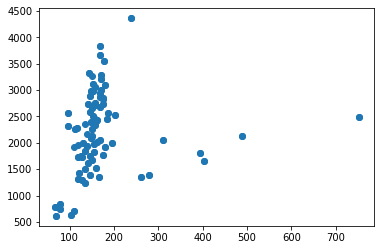

In [ ]:
plt.scatter(data["weight"], data["Price"])

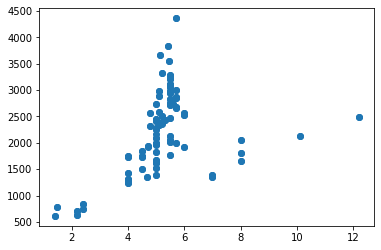

In [ ]:
plt.scatter(data["resoloution"], data["Price"])

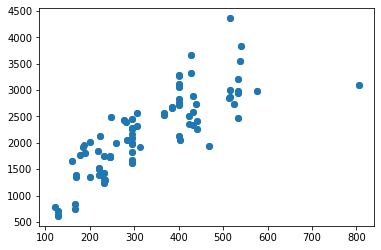

In [ ]:
plt.scatter(data["ppi"], data["Price"])

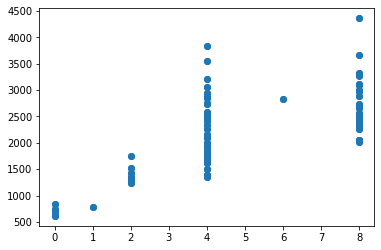

In [ ]:
plt.scatter(data["cpu core"], data["Price"])

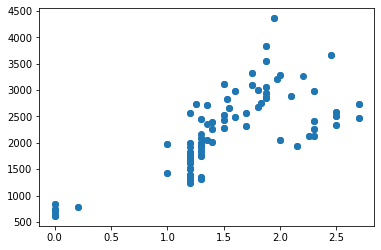

In [ ]:
plt.scatter(data["cpu freq"], data["Price"])

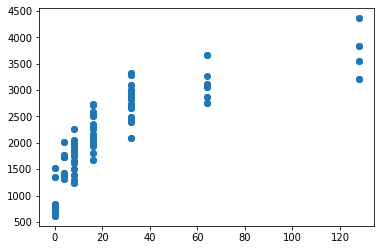

In [ ]:
plt.scatter(data["internal mem"], data["Price"])

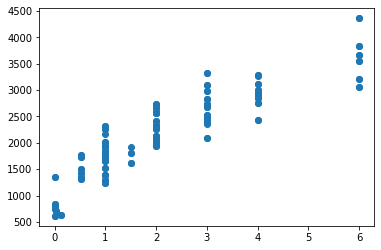

In [ ]:
plt.scatter(data["ram"], data["Price"])

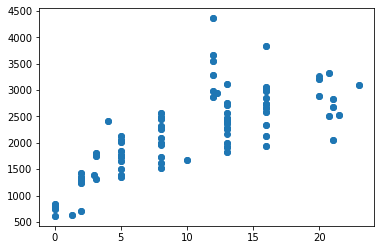

In [ ]:
plt.scatter(data["RearCam"], data["Price"])

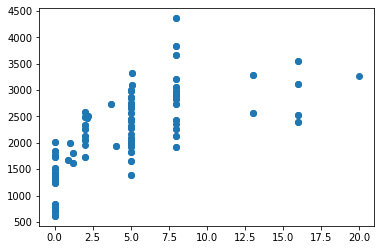

In [ ]:
plt.scatter(data["Front_Cam"], data["Price"])

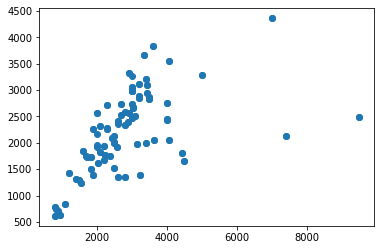

In [ ]:
plt.scatter(data["battery"], data["Price"])

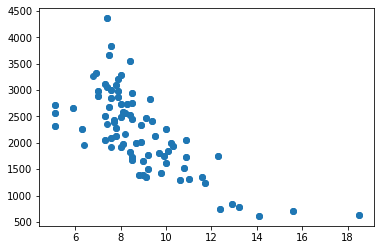

In [ ]:
plt.scatter(data["thickness"], data["Price"])

Saçılım grafiklerine genel olarak baktığımızda fiyat değişkeni üzerinde doğrusal bir etkilerinin olduğu yorumunu yapabiliriz.

X bağımsız değişkenlerimiz olsun(ağırlık,çözünürlük,piksel yoğunluğu,çekirdek türü,frekansı,dahili hafızası ve ram) Y ise bağımlı değişkenimiz olan fiyat bilgisi olsun.

In [ ]:
x=data.drop('Price',axis=1)
y=data['Price']


In [ ]:
x.shape

(161, 13)

In [ ]:
y.shape

(161,)

Elimizdeki veriyi test ve öğrenme verisi olarak ikiye ayıralım .Bunun için verimizin %20 lik kısmını test verisi olarak alalım.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape, y_train.shape

((128, 12), (128,))

In [ ]:
x_test.shape, y_test.shape

((33, 13), (33,))

Bu işlemi de yaptıktan sonra regresyon modeli için ilgili kütüphaneyi yükleyelim ve lineer(doğrusal) regresyon uygulayalım.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

öğrenme verisinden modelimizi kurduk şimdi test verimizle ne kadar açıklayabileceğimize bakalım verimizi.

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [-1.39375880e-02 -6.05649602e-01 -7.49679074e+01  8.03481461e-01
  5.95267149e+01  1.82407654e+02  5.75718735e+00  9.24921731e+01
  6.28395519e+00  6.09895796e+00  1.39913950e-01 -6.55686761e+01]
Intercept: 1625.251335816642
Mean squared error (MSE): 30133.11
Coefficient of determination (R^2): 0.95


Coefficients: Bize modelimizdeki bağımsız değişkenlerin katsayısını verdi.Modeli ne kadar açıkladıklarını gösterdi.


Intercept : Modelimizdeki sabitin değerini verdi yani regresyon doğrusunun y eksenini kestiği noktayı vermiş oldu bize.


Mean squared error (MSE): ortalama hata kareler değeri

Coefficient of determination (R^2)= bağımsız değişkenler bağımlı değişkenin %95ini açıklamaktadır.